# Part-1: Data Exploration and Pre-processing

#1. Load dataset

In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\DELL\Downloads\ML Project - Clustering Cardiac Arrest U16955461930 (1).txt")
data

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2,0,1,0,1,0,0,0,1,0,0,0,no
885,1,0,1,0,1,0,0,0,1,0,0,0,no
886,1,0,0,1,1,0,0,0,1,0,0,0,yes
887,2,0,1,0,0,0,0,1,1,0,0,0,no


# 2. Check null values

In [2]:
data.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

# 3. Print information about dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

# 4. Describe dataset in statistic form

In [4]:
data.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5. Drop under risk column

In [5]:
data.drop("UnderRisk",axis=1,inplace=True)

# Part-2: Working with Models 

# 1. Apply Kmean clustering on dataset

In [6]:
#HighBP (High Blood Pressure) → Predict if a person has high BP.
#Diabetes → Predict if a person has diabetes.
#Metabolic_syndrome → Predict if a person has metabolic syndrome.
#Respiratory_illness → Predict if a person has respiratory illness.

x = data.drop("HighBP",axis=1)
y= data["HighBP"]



In [7]:
#Apply the Elbow Method to find the best K
l1 = []
k_values = range(1, 10)

In [9]:
from sklearn.cluster import KMeans
for i in k_values:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(x)
    l1.append(kmeans.inertia_)

In [10]:
print(l1)

[776.6006749156342, 575.3404423380725, 424.9489261162144, 346.95427786086617, 285.6007590685856, 238.08059305419306, 216.8314099340596, 184.64014394236176, 168.84464917678974]


In [11]:
# Choose an optimal K (e.g., K=3 based on the elbow point)
optimal_k = 776

In [13]:
# Apply K-Means with the chosen K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data["Cluster"]=kmeans.fit_predict(x)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (64) found smaller than n_clusters (776). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [14]:
data.head(10)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,Cluster
0,1,1,1,0,1,0,0,0,1,0,0,0,3
1,1,0,1,0,1,0,0,0,1,0,0,0,1
2,1,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,1,0,0,0,0,0
5,2,0,1,0,1,0,0,0,1,0,0,0,2
6,1,0,1,0,0,0,0,1,1,0,0,0,8
7,2,0,1,0,1,0,0,0,1,0,0,0,2
8,1,0,1,0,1,0,0,0,1,0,0,0,1
9,1,0,1,0,0,0,0,1,1,0,0,0,8


# 2. Print cluster centers

In [15]:
optimal_k = 776

In [16]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

In [17]:
kmeans.fit(data)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (80) found smaller than n_clusters (776). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


KMeans(n_clusters=776, n_init=10, random_state=42)

In [18]:
kmeans.cluster_centers_

array([[-3.91563555, -2.28683915,  4.0776153 , ..., -0.40607424,
        -0.61979753, 47.45331834],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , 30.        ],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         1.        ,  9.        ],
       ...,
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  6.        ],
       [ 2.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  5.        ],
       [ 2.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  5.        ]])

# 3. Create column cluster for predicted labels value

In [19]:
data["Cluster"]

0      3
1      1
2      1
3      1
4      0
      ..
884    2
885    1
886    4
887    5
888    3
Name: Cluster, Length: 889, dtype: int32

# 4. Plot the hierarchical clustering using scipy

In [20]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [21]:
linkage_matrix = linkage(data, method='single')

In [22]:
linkage_matrix

array([[   0.        ,   69.        ,    0.        ,    2.        ],
       [  76.        ,  889.        ,    0.        ,    3.        ],
       [  80.        ,  890.        ,    0.        ,    4.        ],
       ...,
       [1770.        , 1772.        ,    3.        ,   22.        ],
       [1773.        , 1774.        ,    3.16227766,  887.        ],
       [1749.        , 1775.        ,    3.16227766,  889.        ]])

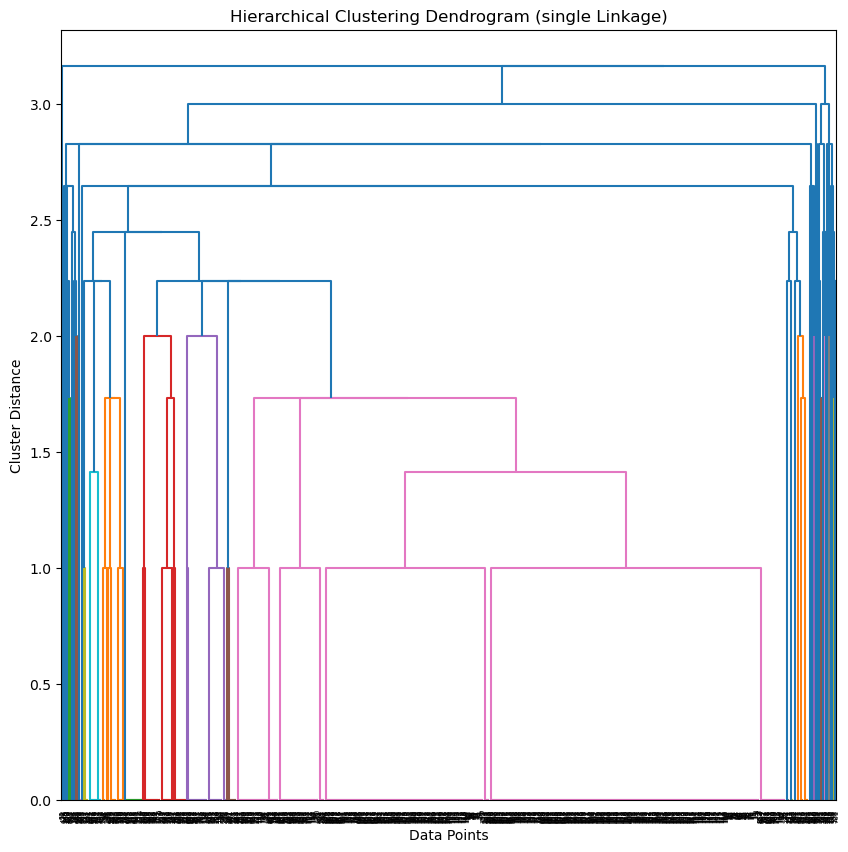

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Cluster Distance")
plt.title("Hierarchical Clustering Dendrogram (single Linkage)")
plt.show()

# 5. Apply Agglomerative Clustering using number of clusters

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
model=AgglomerativeClustering(n_clusters=3,distance_threshold=None,linkage="single")

In [26]:
model.fit_predict(data)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,

In [27]:
data["Clusters"]=model.fit_predict(data)

In [28]:
data["Clusters"]

0      2
1      2
2      2
3      2
4      2
      ..
884    2
885    2
886    2
887    2
888    2
Name: Clusters, Length: 889, dtype: int64

# 6. Create label column for predicted cluster label

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [30]:
linkage_matrix = linkage(data, method="single")

In [31]:
num_clusters = 776
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [32]:
data["Cluster"] = cluster_labels

In [33]:
print("Data with Predicted Cluster Labels:")
print(data)

Data with Predicted Cluster Labels:
     Gender  Chain_smoker  Consumes_other_tobacco_products  HighBP  Obese  \
0         1             1                                1       0      1   
1         1             0                                1       0      1   
2         1             0                                1       0      1   
3         1             0                                1       0      1   
4         1             0                                0       0      0   
..      ...           ...                              ...     ...    ...   
884       2             0                                1       0      1   
885       1             0                                1       0      1   
886       1             0                                0       1      1   
887       2             0                                1       0      0   
888       1             1                                1       0      1   

     Diabetes  Metabolic_syndrome  Use_

# 7. Show label counts.

In [34]:
data["Cluster"].count()

889

# 8. Show a silhouette score

In [35]:
from sklearn.metrics import silhouette_score
silhouette_score(data,data["Cluster"])

0.9583802024746907